# Procedure
1. Data import
2. Normarize & One-hot encording
3. Create Model
4. Deep Learning
5. Check history(Graph)
6. Evaluate

170508288/170498071 [==============================] - 2s 0us/step
(32, 32, 3)


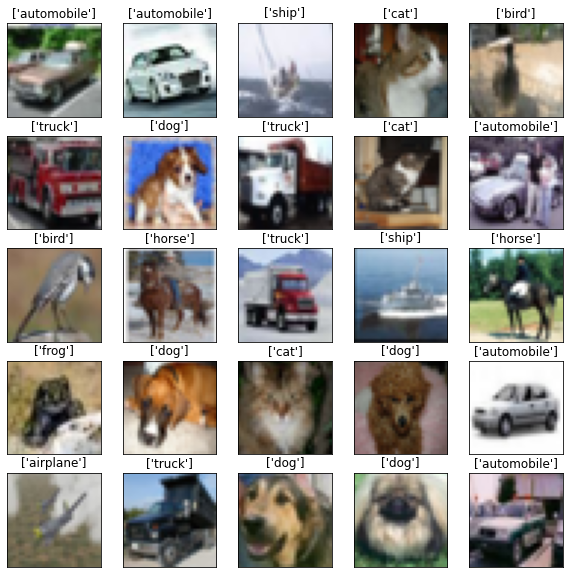

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10


(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print(x_train[0].shape)

cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer",
                           "dog", "frog", "horse", "ship", "truck"])

n_image = 25
rand_id = np.random.randint(0, len(x_train), n_image)


plt.figure(figsize=(10,10))

for i in range(n_image):
  #cifar_img = plt.subplot(5,5, i+1)
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[rand_id[i]])
  label = cifar10_labels[t_train[rand_id[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 



In [2]:
from keras.utils import np_utils

t_train = np_utils.to_categorical(t_train)
t_test = np_utils.to_categorical(t_test)
print(t_train[:10])

x_train = x_train / 255
x_test = x_test / 255

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import Adam

n_class = 10

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

NameError: ignored

In [ ]:
history = model.fit(x_train, t_train, epochs=10, batch_size=100, validation_data=(x_test, t_test))

Epoch 1/10
500/500 [==============================] - 6s 10ms/step - loss: 1.8051 - accuracy: 0.3315 - val_loss: 1.2032 - val_accuracy: 0.5807
Epoch 2/10
500/500 [==============================] - 4s 9ms/step - loss: 1.2316 - accuracy: 0.5618 - val_loss: 1.0607 - val_accuracy: 0.6268
Epoch 3/10
500/500 [==============================] - 5s 9ms/step - loss: 1.0328 - accuracy: 0.6367 - val_loss: 0.8958 - val_accuracy: 0.6884
Epoch 4/10
500/500 [==============================] - 5s 9ms/step - loss: 0.8984 - accuracy: 0.6870 - val_loss: 0.8268 - val_accuracy: 0.7128
Epoch 5/10
500/500 [==============================] - 5s 9ms/step - loss: 0.7904 - accuracy: 0.7250 - val_loss: 0.8047 - val_accuracy: 0.7147
Epoch 6/10
500/500 [==============================] - 4s 9ms/step - loss: 0.7183 - accuracy: 0.7494 - val_loss: 0.7635 - val_accuracy: 0.7349
Epoch 7/10
500/500 [==============================] - 5s 9ms/step - loss: 0.6571 - accuracy: 0.7694 - val_loss: 0.7250 - val_accuracy: 0.7442
Epoch

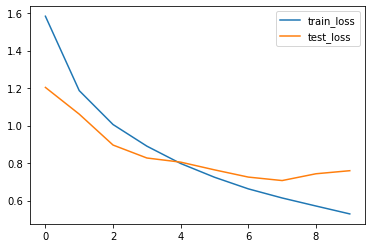

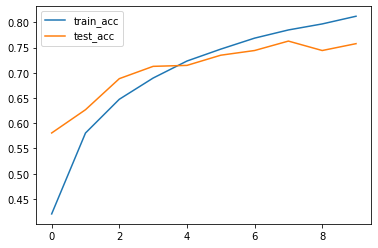

In [ ]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.plot(np.arange(len(train_loss)), train_loss, label="train_loss")
plt.plot(np.arange(len(test_loss)), test_loss, label="test_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label="train_acc")
plt.plot(np.arange(len(train_acc)), test_acc, label="test_acc")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.7591 - accuracy: 0.7578
0.7590503692626953 0.7577999830245972


In [ ]:
n_image = 25
rand_id = np.random.randint(0, len(x_train), n_image)


plt.figure(figsize=(10,10))

for i in range(n_image):
  #cifar_img = plt.subplot(5,5, i+1)
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[rand_id[i]])
  label = cifar10_labels[t_train[rand_id[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 

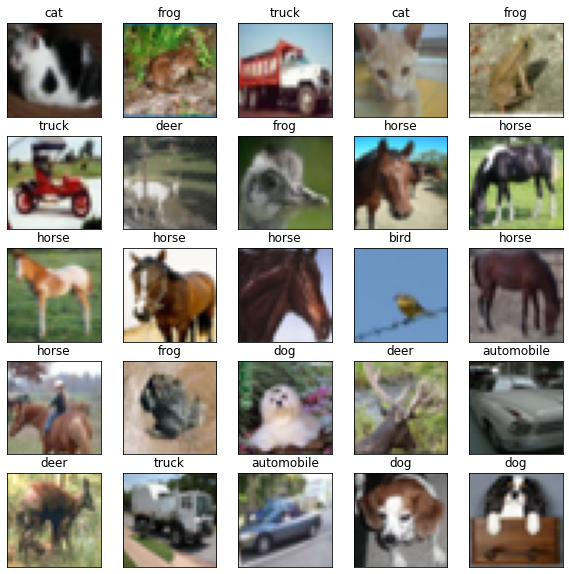

In [ ]:
n_image = 25
rand_id2 = np.random.randint(0, len(x_test), n_image)

y_rand = model.predict(x_test[rand_id2])
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_id2[i]])
    label = cifar10_labels[predicted_class[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()